In [77]:
# -*- coding: utf-8 -*-
# -*- author : Lokman Mheni - Fabio Palmisano -*-
# -*- date : 2024-04-20 -*-
# -*- Last revision: 2024-05-14 *-
# -*- python version : 3.11.9 -*-
# -*- Description: Logistic Regression-*-

In [78]:
import numpy as np
import pandas as pd
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from itertools import combinations
from collections import defaultdict
from tqdm import tqdm

#!pip install grakel
from grakel import GraphKernel
from grakel.utils import graph_from_networkx
from tqdm import tqdm


tr = pd.read_csv( 'data/to_read.csv' )


In [79]:
tr.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [80]:
# Check how many times each book has been added to 'to read'
tr['book_id'].value_counts()

book_id
47      2772
143     1967
113     1840
13      1812
11      1767
        ... 
6297       1
7951       1
4434       1
9124       1
8946       1
Name: count, Length: 9986, dtype: int64

In [81]:
# Check how many times a book has only one user who added it to 'to read'
(tr['book_id'].value_counts() < 50).sum()

5641

In [82]:
# Create a dictionary where the keys are user_ids and the values are sets of book_ids
user_books = defaultdict(set)

# Populate the dictionary
for _, row in tqdm(tr.iterrows(), total=tr.shape[0]):
    user_books[row['user_id']].add(row['book_id'])


100%|██████████| 912705/912705 [00:29<00:00, 31422.63it/s]


In [83]:
import random

# Select a random subset of users
user_subset = random.sample(list(user_books.keys()), 1000)

# Create an empty graph
G_user_books_sample = nx.Graph()

# Iterate over each user in the subset
for user_id in tqdm(user_subset, total=len(user_subset)):
    # Get the books for this user
    books = user_books[user_id]
    
    # Generate all pairs of books for this user
    book_pairs = combinations(books, 2)
    
    # Add edges between all pairs of books
    for book_pair in book_pairs:
        G_user_books_sample.add_edge(*book_pair, user_id=user_id)

# Print the number of nodes and edges in the sampled graph
print(len(G_user_books_sample.nodes()))
print(len(G_user_books_sample.edges()))

  0%|          | 0/1000 [00:00<?, ?it/s]

100%|██████████| 1000/1000 [00:00<00:00, 2443.00it/s]

5639
251623


In [84]:
number_to_read =  tr['book_id'].value_counts()
number_to_read = number_to_read.apply(lambda x: 1 if x >= 100 else 0)
number_to_read

book_id
47      1
143     1
113     1
13      1
11      1
       ..
6297    0
7951    0
4434    0
9124    0
8946    0
Name: count, Length: 9986, dtype: int64

In [85]:
number_to_read.count()

9986

In [86]:
number_to_read.value_counts()

count
0    7713
1    2273
Name: count, dtype: int64

In [87]:
nx.set_node_attributes(G_user_books_sample, number_to_read.to_dict(), 'to_read')

In [88]:
# Can we compare what we have in graph_labels and what we have in the graph nodes ? 
# The answer is yes, we can compare the two lists and check if they are the same.
# We can do this by using the following code:
set(G_user_books_sample.nodes()).issubset(set(number_to_read.index))


True

In [89]:
#check in G_user_books_sample the proportion of nodes set to label 1 (to read) and which are set to 0 (not to read)
to_read = 0
not_to_read = 0
for node in G_user_books_sample.nodes(data=True):
    if node[1]['to_read'] == 1:
        to_read += 1
    else:
        not_to_read += 1
print(to_read, not_to_read)

2180 3459


In [90]:
graph_labels = nx.get_node_attributes(G_user_books_sample, 'to_read')
graph_labels

{3488: 1,
 870: 1,
 7455: 1,
 7425: 0,
 1167: 1,
 143: 1,
 4879: 0,
 6932: 1,
 663: 1,
 1184: 1,
 3491: 1,
 4004: 0,
 39: 1,
 7209: 0,
 1577: 1,
 430: 1,
 46: 1,
 1710: 1,
 2613: 1,
 439: 1,
 60: 1,
 959: 1,
 1988: 1,
 68: 1,
 587: 1,
 974: 1,
 4307: 1,
 468: 1,
 8788: 0,
 470: 1,
 119: 1,
 736: 1,
 6241: 0,
 737: 1,
 867: 1,
 2403: 1,
 103: 1,
 236: 1,
 5101: 1,
 9202: 0,
 630: 1,
 5623: 0,
 33: 1,
 217: 1,
 1926: 1,
 424: 1,
 4906: 0,
 687: 1,
 47: 1,
 881: 1,
 3349: 1,
 21: 1,
 3543: 1,
 24: 1,
 6425: 1,
 3745: 1,
 4962: 1,
 6691: 0,
 1699: 1,
 193: 1,
 9422: 0,
 4659: 0,
 6964: 0,
 3161: 0,
 730: 1,
 1723: 1,
 2974: 0,
 2687: 0,
 516: 1,
 653: 1,
 117: 1,
 534: 1,
 7002: 0,
 2439: 0,
 9624: 0,
 8992: 0,
 1185: 1,
 290: 1,
 677: 1,
 3504: 1,
 8242: 0,
 5944: 1,
 8891: 0,
 2621: 0,
 4670: 0,
 4039: 1,
 591: 1,
 9295: 0,
 338: 1,
 4050: 0,
 7771: 0,
 869: 1,
 378: 1,
 4850: 0,
 1909: 1,
 7543: 0,
 2298: 1,
 1027: 1,
 3975: 0,
 1032: 1,
 149: 1,
 2838: 1,
 1045: 1,
 3607: 1,
 1022: 1,


In [91]:
seed = 42
# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

## We want for each node take is degree, closeness centrality, betweeness centrality as features and that make a model to predict if it's a blockbuster (1 in to read) or not 
# Create a DataFrame with the degree, closeness centrality, and betweenness centrality of each node
node_features = pd.DataFrame(index=G_user_books_sample.nodes())

# Calculate the degree of each node
node_features['degree'] = pd.Series(dict(G_user_books_sample.degree()))

# Calculate the closeness centrality of each node
node_features['closeness'] = pd.Series(nx.closeness_centrality(G_user_books_sample))

# Calculate the betweenness centrality of each node
node_features['betweenness'] = pd.Series(nx.betweenness_centrality(G_user_books_sample))

#Calculate the clustering coefficient of each node
node_features['clustering'] = pd.Series(nx.clustering(G_user_books_sample))

# Calculate the eigenvector centrality of each node
node_features['eigenvector'] = pd.Series(nx.eigenvector_centrality(G_user_books_sample))

# Calculate the pagerank of each node
node_features['pagerank'] = pd.Series(nx.pagerank(G_user_books_sample))

# Calculate the average neighbor degree of each node
node_features['average_neighbor_degree'] = pd.Series(nx.average_neighbor_degree(G_user_books_sample))

# Merge the node features with the graph labels
node_features = node_features.merge(pd.Series(graph_labels, name ='graph_labels'), left_index=True, right_index=True)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features.drop('graph_labels', axis=1), node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)
# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

#F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


# Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

pd.DataFrame({'Real': y_test, 'Predicted': y_pred})


[0 0 1 ... 0 1 0]
Accuracy:  0.8114657210401891
F1 Score:  0.7343880099916735


,Real,Predicted
8165,0,0
3337,1,0
710,1,1
6827,0,0
2838,1,1
...,...,...
3044,0,0
17,1,1
4095,0,0
4727,0,1


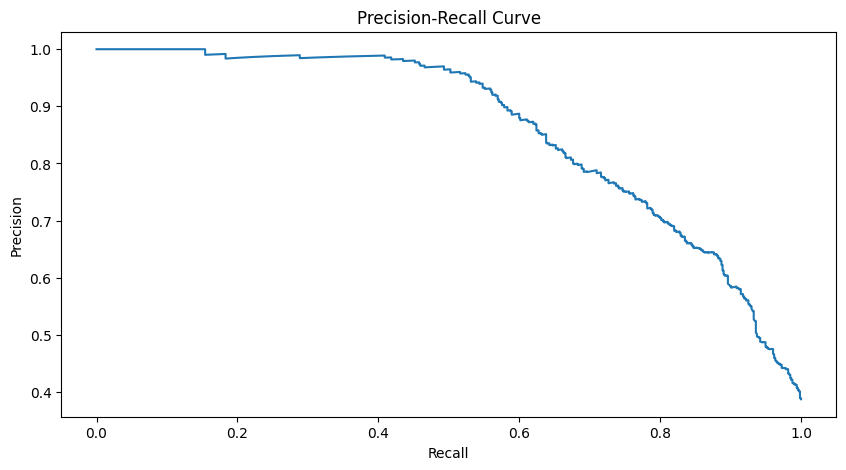

In [92]:
from sklearn.metrics import precision_recall_curve

# Get the probabilities of the positive class
y_scores = model.predict_proba(X_test)[:, 1]

# Get the precision and recall values for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find the threshold that gives the best F1 score
f1_scores = 2*recall*precision / (recall + precision)
best_threshold = thresholds[np.argmax(f1_scores)]

# Use this threshold to predict the classes
y_pred = (y_scores > best_threshold).astype(int)

# Print the precision-recall curve for the model 
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

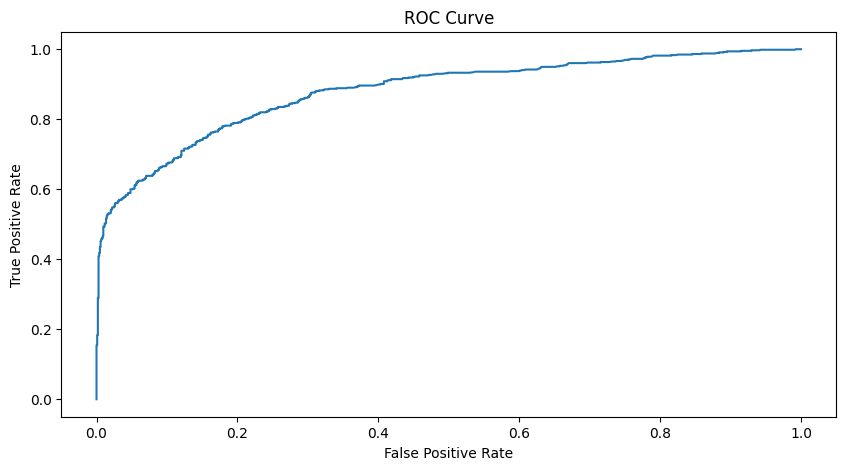

In [93]:
# Plot the ROC curve
from sklearn.metrics import roc_curve

# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Plot the ROC curve
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [94]:
node_features

,degree,closeness,betweenness,clustering,eigenvector,pagerank,average_neighbor_degree,graph_labels
3488,135,0.458656,0.000265,0.411719,0.014993,0.000245,274.162963,1
870,216,0.472395,0.000844,0.301809,0.022839,0.000384,260.194444,1
7455,53,0.409246,0.000025,0.505080,0.003460,0.000121,183.377358,1
7425,49,0.425645,0.000011,0.700680,0.005783,0.000104,299.244898,0
1167,354,0.489608,0.000598,0.260527,0.038536,0.000559,260.694915,1
...,...,...,...,...,...,...,...,...
6777,58,0.421218,0.000000,1.000000,0.006680,0.000116,292.103448,0
2724,3,0.350103,0.000000,1.000000,0.000491,0.000031,376.666667,0
4753,11,0.359630,0.000000,1.000000,0.000628,0.000050,163.818182,0
7476,11,0.359630,0.000000,1.000000,0.000628,0.000050,163.818182,0


In [95]:
# Now can we try to make different combinaisons of features to see what has the best accuracy and F1 score and store the result in a datafram in order to print the best combinaison
from sklearn.metrics import f1_score

# Create a DataFrame to store the results
results = pd.DataFrame(columns=['features', 'accuracy', 'f1_score'])

# Iterate over all possible combinations of features
for i in range(1, len(node_features.columns) - 1):
    for features in combinations(node_features.columns[:-1], i):
        print(features)
        # Split the data into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(node_features[list(features)], node_features['graph_labels'], test_size=0.3, random_state=seed)

        # Train a simple model
        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate the accuracy and F1 score of the model
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

       # Append the results to the DataFrame
        results.loc[len(results)] = [features, accuracy, f1]
        print(accuracy, f1)

# Print the results
results.sort_values('f1_score', ascending=False).head(10)

# Print the best combinaison
best_combinaison = results.sort_values('f1_score', ascending=False).iloc[0]
print("Best combinaison of features:")
print(best_combinaison['features'])
print("Accuracy:", best_combinaison['accuracy'])
print("F1 Score:", best_combinaison['f1_score'])


('degree',)
0.8132387706855791 0.723292469352014
('closeness',)
0.8073286052009456 0.7052441229656421
('betweenness',)
0.6128841607565012 0.0
('clustering',)
0.791371158392435 0.734785875281743
('eigenvector',)
0.624113475177305 0.05637982195845697
('pagerank',)
0.6128841607565012 0.0
('average_neighbor_degree',)
0.5591016548463357 0.08578431372549018
('degree', 'closeness')
0.8132387706855791 0.723292469352014
('degree', 'betweenness')
0.8132387706855791 0.723292469352014
('degree', 'clustering')
0.8073286052009456 0.7269681742043551
('degree', 'eigenvector')
0.8132387706855791 0.723292469352014
('degree', 'pagerank')
0.8132387706855791 0.723292469352014
('degree', 'average_neighbor_degree')
0.8126477541371159 0.7221735319894829
('closeness', 'betweenness')
0.8073286052009456 0.7052441229656421
('closeness', 'clustering')
0.8055555555555556 0.7431693989071038
('closeness', 'eigenvector')
0.8073286052009456 0.7047101449275363
('closeness', 'pagerank')
0.8073286052009456 0.7052441229656

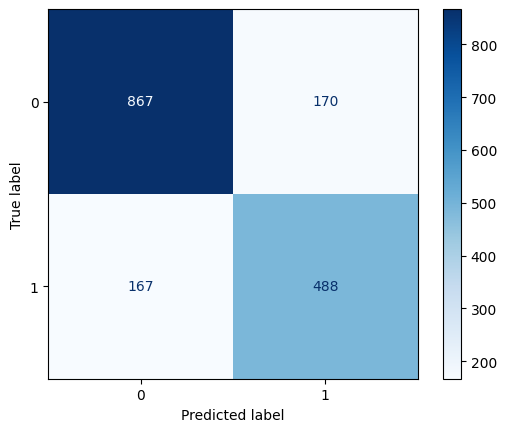

In [96]:
# Plot the matrix of confusion
from sklearn.metrics import ConfusionMatrixDisplay

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.show()



In [97]:
# Make the same but with an other model 
from sklearn.ensemble import RandomForestClassifier

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features[list(best_combinaison['features'])], node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))

Accuracy:  0.7949172576832151
F1 Score:  0.7171964140179299


In [98]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features.drop('graph_labels', axis=1), node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = RandomForestClassifier(random_state=seed)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)
# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

#F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


# Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

[0 1 1 ... 1 0 0]
Accuracy:  0.7972813238770685
F1 Score:  0.7236099919419822


,Real,Predicted
8165,0,0
3337,1,1
710,1,1
6827,0,0
2838,1,1
...,...,...
3044,0,0
17,1,1
4095,0,1
4727,0,0


In [99]:
#Try with SVM
from sklearn.svm import SVC

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(node_features.drop('graph_labels', axis=1), node_features['graph_labels'], test_size=0.3, random_state=seed)

# Train a simple model
model = SVC(probability=True)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)
# Calculate the accuracy of the model
accuracy_score(y_test, y_pred)

#F1 score
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

# Print the results
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))


# Print the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

pd.DataFrame({'Real': y_test, 'Predicted': y_pred})

[0 0 1 ... 0 0 0]
Accuracy:  0.8096926713947991
F1 Score:  0.6973684210526316


,Real,Predicted
8165,0,0
3337,1,0
710,1,1
6827,0,0
2838,1,1
...,...,...
3044,0,0
17,1,1
4095,0,0
4727,0,0
